In [3]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

**Hints for students:** The utility section contains code you need to use *unchanged* to generate the test data required. You may use this code for your final solution, beware not to overwrite function definitions in this section. Otherwise you can ignore the code in this section.

# Utilities

**Note:** Section 1.1-1.4 is identical to the MST example (Week 3). 1.5-1.10 are adjustments of the data structures for the current problem. 

## Points and Distances

In [4]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

## Maps

In [5]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=7,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        for w in W:
            plt.plot([w[0]], [w[1]], styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

## Add Targets

In [6]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

## Generate Warehouse Locations

In [7]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

In [8]:
def generateWarehouseLocations(M, seed=None):
    if seed is not None:
        random.seed(seed)
    V, _ = M
    W = random.sample(V, k=len(V)//10)
    return W

# Loading Sample Data

In [9]:
import pickle
with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

Split the map into Vertices and Edges:

In [10]:
V, E = M

Pick a random location for the Warehouse at one of the intersections (vertices) on the map.

In [11]:
W = generateWarehouseLocations(M,6077)

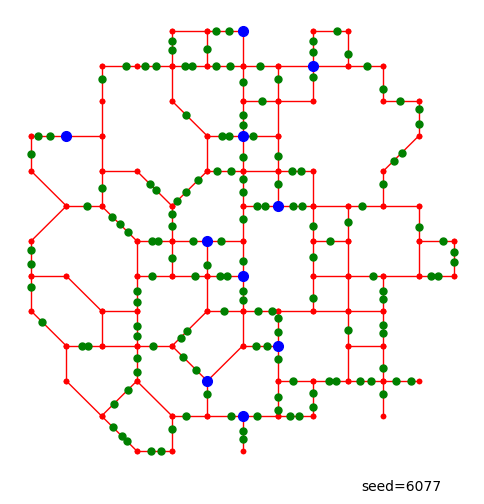

In [12]:
plotMap(M, T=C, P=[], W=W, text="seed=6077")

# Generating Delivery Data

In [13]:
def generateDeliveryData(p, C, days, seed=0):
    ## p is the average number of parcels per day per customer
    ## C is the number of customers to be served
    ## days is the number of days for which data are to be generated.
    np.random.seed(seed)
    R = np.random.poisson(lam=C*p, size=days)
    D = [ sorted(list(np.random.choice(range(C), size=i))) for i in R ]
    return D

## Demo Example

In [14]:
D = generateDeliveryData(0.15,150, 30,6077)
D

[[3,
  8,
  18,
  20,
  27,
  32,
  34,
  40,
  45,
  50,
  52,
  55,
  69,
  71,
  73,
  74,
  79,
  85,
  86,
  91,
  94,
  101,
  122,
  124,
  135,
  135,
  145],
 [1,
  8,
  10,
  13,
  34,
  39,
  46,
  58,
  67,
  71,
  78,
  81,
  100,
  100,
  108,
  127,
  127,
  129,
  134,
  137,
  140,
  141,
  143,
  147],
 [0,
  3,
  6,
  15,
  18,
  25,
  32,
  34,
  35,
  42,
  42,
  47,
  49,
  52,
  53,
  61,
  74,
  77,
  91,
  96,
  102,
  114,
  119,
  121,
  132,
  142,
  146],
 [10, 14, 17, 29, 29, 31, 41, 58, 72, 85, 89, 96, 109, 110, 112, 124, 141],
 [12, 19, 20, 51, 58, 75, 76, 86, 92, 98, 100, 107, 135, 137, 140, 146],
 [8, 11, 12, 29, 30, 76, 78, 82, 84, 110, 117, 119, 125, 126, 126, 134, 145],
 [2, 8, 14, 15, 25, 40, 55, 90, 97, 103, 112, 116, 120, 141, 149],
 [4,
  10,
  15,
  20,
  30,
  33,
  37,
  48,
  61,
  67,
  68,
  82,
  82,
  96,
  98,
  101,
  101,
  104,
  108,
  108,
  116,
  118,
  127,
  133,
  136,
  141],
 [10,
  14,
  15,
  17,
  33,
  34,
  46,
  50,
  

In [15]:
sum([len(i) for i in D])

646

Over 5 days, a total of 11 parcels are to be delivered:

- On the first day deliver one parcel to customers 0 and two parcels to customer 3. 
- On the second day deliver one parcel each to customer 0 and 5.
- On the third day deliver one parcel each to customers 1, 2 and 8, and two parcels to customer 3.
- On the fourth day deliver one parcel to customer 3.
- And on the fiths day there are no parcels to delier.

# Delivery over one month for Sample Map

In [16]:
D = generateDeliveryData(0.23, len(C), 30,6077)

In [17]:
sum([len(i) for i in D])

1004